In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [35]:



x1 = np.linspace(-5, 5, 100)
y1 = np.sqrt((5**2) - (x1**2))
x1 = np.hstack([x1, x1])  
y1 = np.hstack([y1, -y1])  


x2 = np.linspace(-10, 10, 100)
y2 = np.sqrt((10**2) - (x2**2))
x2 = np.hstack([x2, x2]) 
y2 = np.hstack([y2, -y2]) 



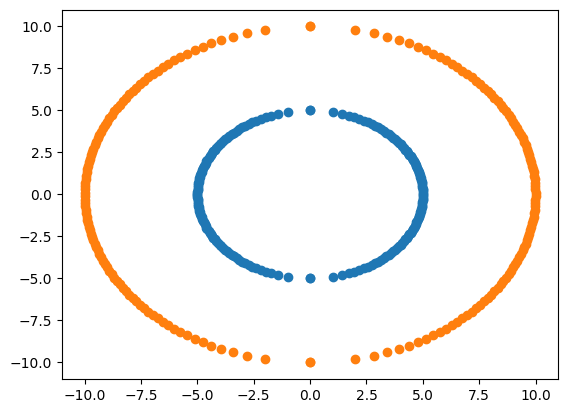

In [36]:
plt.scatter(y1,x1)
plt.scatter(y2,x2)

###	1.	Equation of a Circle
The equation of a circle with radius r and center at (0, 0) is:

x^2 + y^2 = r^2

Here, r = 5, so the equation becomes:

x^2 + y^2 = 5^2 = 25

###	2.	Solving for y
Rearranging this equation to solve for y, we get:

y = +-root(25 - x^2)

This equation gives both the upper (+) and lower (-) halves of the circle.

In [37]:
df1=pd.DataFrame(np.vstack([y1,x1]).T,columns=['x1','x2'])
df1['y']=0
df2=pd.DataFrame(np.vstack([y2,x2]).T,columns=['x1','x2'])
df2['y']=1
df=pd.concat([df1,df2])
df.head()


,x1,x2,y
0,0.000000,-5.00000,0
1,0.999949,-4.89899,0
2,1.406908,-4.79798,0
3,1.714198,-4.69697,0
4,1.969049,-4.59596,0


In [38]:
df.tail()

,x1,x2,y
195,-3.938099,9.191919,1
196,-3.428397,9.393939,1
197,-2.813816,9.595960,1
198,-1.999898,9.797980,1
199,-0.000000,10.000000,1


In [39]:
df['x2_square']=df['x2']**2
df['x1_square']=df['x1']**2
df['x2*x1']=df['x2']*df['x1']

In [40]:
df.head()

,x1,x2,y,x2_square,x1_square,x2*x1
0,0.000000,-5.00000,0,25.000000,0.000000,-0.000000
1,0.999949,-4.89899,0,24.000102,0.999898,-4.898740
2,1.406908,-4.79798,0,23.020610,1.979390,-6.750316
3,1.714198,-4.69697,0,22.061524,2.938476,-8.051537
4,1.969049,-4.59596,0,21.122845,3.877155,-9.049671


In [41]:
x=df[['x2_square','x1_square','x2*x1']]
y=df['y']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [43]:
x_train.head()

,x2_square,x1_square,x2*x1
50,0.010203,99.989797,1.010049
63,1.859504,23.140496,6.559714
112,57.392103,42.607897,49.450549
159,0.920824,24.079176,-4.708789
83,45.801449,54.198551,49.823410


In [44]:
import plotly.express as px

In [45]:
fig=px.scatter_3d(df,x='x1_square',y='x2_square',z='x2*x1',color='y')
fig.show()

# polynoomial kernel

In [46]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
y_pred=classifier.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
score=accuracy_score(y_test,y_pred)

In [50]:
score

1.0

# rbf kernel

In [51]:
x=df.iloc[:,0:2]
y=df['y']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(x_train,y_train)

SVC()

In [54]:
y_pred=classifier.predict(x_test)

In [55]:
score=accuracy_score(y_test,y_pred)

In [56]:
score

1.0

# sigmoid kernel

In [57]:
from sklearn.svm import SVC
classifier=SVC(kernel='sigmoid')
classifier.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [58]:
y_pred=classifier.predict(x_test)

In [59]:
score=accuracy_score(y_test,y_pred)

In [60]:
score

0.65